## Dataset
Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.  https://github.com/zalandoresearch/fashion-mnist

We implement Multi-layer Perceptron to classify the images in this dataset.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
fashion_mnist = keras.datasets.fashion_mnist

#Create data matrix X and label vector Y for both the train and test set
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [3]:
#Each label from 0 to 9 has a class name. We need to store it with our data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data Exploration and Pre-Proprocessing

<function matplotlib.pyplot.show(*args, **kw)>

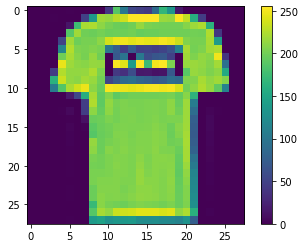

In [4]:
#Inspect an image from the train set
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(False)
plt.show

In [5]:
#Scale the data between 0 to 1
X_train = X_train /255.0 #Covert int to float
X_test = X_test /255.0

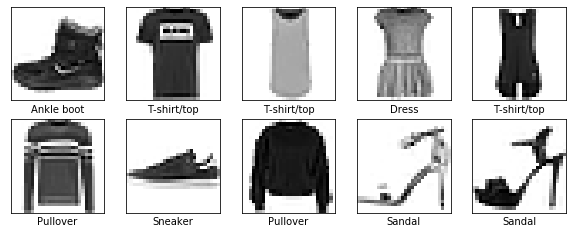

In [6]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])
plt.show()
    

## Create MLP Model

In [7]:
#Set up layers of the NN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Layer-1: Tranform 2d-array of 28x28 into 1d-array of 28*28=784 pixels
    keras.layers.Dense(128, activation='relu'), #Layer-2: Densely(Fully) connected neurals with 128 neurons
    keras.layers.Dense(10) #Layer-3: Densely connected layer with 10 nodes, one for each class
])

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
-  Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [8]:
#Compile the model to include additional settings
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [9]:
#Train the model
model.fit(X_train, Y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4992 - accuracy: 0.8237
Epoch 2/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3745 - accuracy: 0.8638
Epoch 3/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3325 - accuracy: 0.8790
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3115 - accuracy: 0.8861
Epoch 5/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2935 - accuracy: 0.8913
Epoch 6/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2784 - accuracy: 0.8964
Epoch 7/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2660 - accuracy: 0.9000
Epoch 8/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2552 - accuracy: 0.9047
Epoch 9/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2475 - accuracy: 0.9072
Epoch 10/10
60

## Evaluate Model Performance

In [10]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=2)
print("The model accuracy on test data is: ", accuracy)

10000/10000 - 0s - loss: 0.3272 - accuracy: 0.8835
The model accuracy on test data is:  0.8835


## Make Predictions using the Model

In [11]:
#Softmax layer converts the logits output to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

#Make predictions on test data
predictions = probability_model.predict(X_test)

#View a prediction
predictions[0] #Array of size 10 showing confidence of model for each class

#Find the class with highest confidence value
predicted = np.argmax(predictions[0])
print("The predicted class is:", predicted)

#Compare with the actual class
print("The actual class is: ", Y_test[0])

The predicted class is: 9
The actual class is:  9


In [12]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

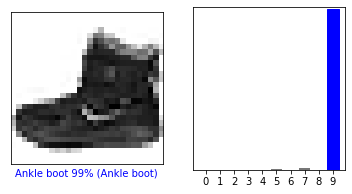

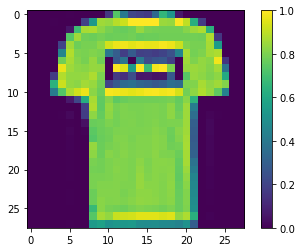

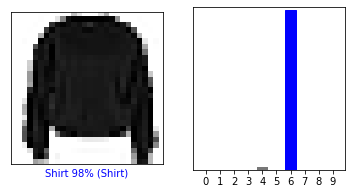

In [13]:
#Verify the predictions by viewing the image

#Check the first image
position = 0 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(position, predictions[position], Y_test, X_train)
plt.subplot(1,2,2)
plot_value_array(position, predictions[position], Y_test)
plt.show()
#Inspect an image from the train set
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(False)
plt.show

#Check the eigth image
position = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(position, predictions[position], Y_test, X_train)
plt.subplot(1,2,2)
plot_value_array(position, predictions[position], Y_test)
plt.show()

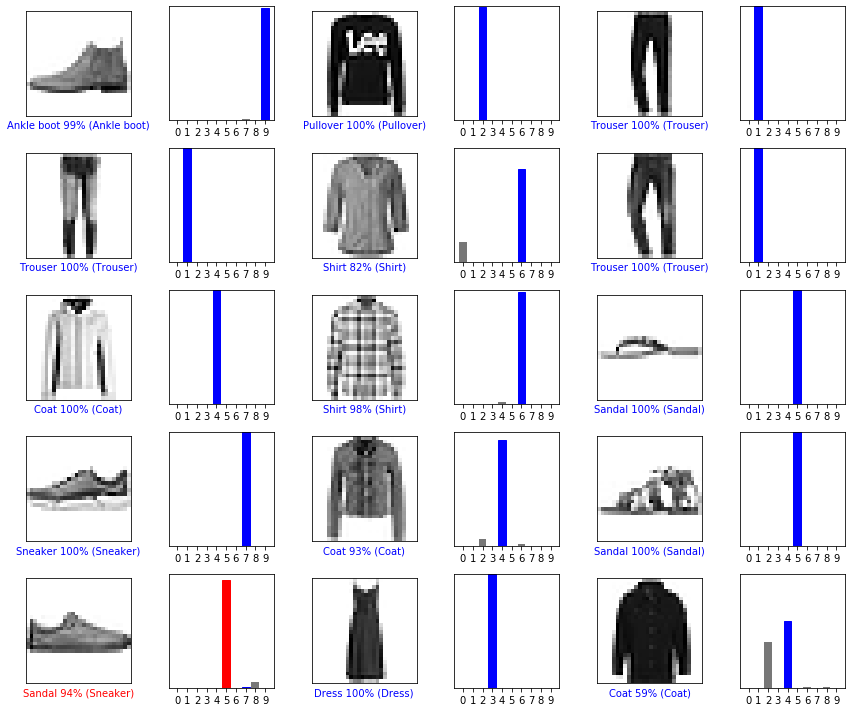

In [14]:
# Plot the first X test images, their predicted labels, and the true labels

# Color correct predictions in blue and incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], Y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], Y_test)
plt.tight_layout()
plt.show()

Image Dimensions: (28, 28)


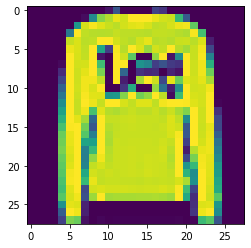

In [15]:
#Make prediction on a single image

img = X_test[1] 

#Check the image
plt.figure()
plt.imshow(img)
plt.grid(False)
plt.show

print("Image Dimensions:", img.shape)


New dimensions: (1, 28, 28)

Predictions: [[1.5940617e-06 7.5097662e-12 9.9851316e-01 1.8177257e-10 3.5885227e-04
  5.4765140e-17 1.1263984e-03 1.1110187e-16 8.4517220e-12 4.7604040e-16]]

Predicted Class: 2


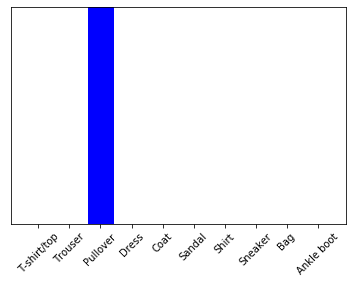

In [16]:
#Add img to list as keras makes predictions on a batch/collection of examples at once
img = (np.expand_dims(img,0))
print("New dimensions:", img.shape)

#Predict using the model
prediction_img = probability_model.predict(img)
print("\nPredictions:", prediction_img)
print("\nPredicted Class:", np.argmax(prediction_img))

#Plot the class with highest probability
plot_value_array(1, prediction_img[0], Y_test)


#Print name of class on the chart
_ = plt.xticks(range(10), class_names, rotation=45)

## Results
Thus, the model was able to predict the given image accurately.